In [6]:
import numpy as np
import matplotlib.pyplot as plt

def weightVector():
  w_0_star = np.random.uniform(-0.25, 0.25)
  w_1_star = np.random.uniform(-1, 1)
  w_2_star = np.random.uniform(-1, 1)
  w_star = [w_0_star, w_1_star, w_2_star]
  return w_star

w_star = weightVector()
print(w_star)


[-0.20804209774248367, 0.15008323417476732, -0.372239200383498]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(X, y, eta=1, max_epochs=100, weights=[]):
    if len(weights) == 0:
        weights = np.random.uniform(-0.1, 0.1, X.shape[1])
    error_log = []

    for epoch in range(max_epochs):
        misclassified = 0
        for i in range(len(y)):
            prediction = np.dot(X[i], weights) > 0
            adjustment = eta * (y[i] - prediction)
            weights += adjustment * X[i]
            misclassified += int(adjustment != 0)

        error_log.append(misclassified)

        if misclassified == 0:
            break

    return weights, error_log

def compute(n, eta_values, initial_weights):
    seed = 112
    np.random.seed(seed)
    print("Initial weights:", initial_weights)


    w_star = np.random.uniform(-1, 1, 3)

    x1 = np.random.uniform(-1, 1, n)
    x2 = np.random.uniform(-1, 1, n)

    x = np.column_stack((np.ones(n), x1, x2))

    y = (np.dot(x, w_star) > 0).astype(int)

    plt.scatter(x1[y == 1], x2[y == 1], color='red', label='y=1')
    plt.scatter(x1[y == 0], x2[y == 0], color='blue', label='y=0')

    x_vals = np.linspace(-1, 1, 100)
    y_vals = -(w_star[1] * x_vals + w_star[0]) / w_star[2]
    xx=x_vals
    yy=y_vals
    plt.plot(x_vals, y_vals, label='Original boundary')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

    w_final, errors = perceptron(x, y, weights=initial_weights)
    print("Final weights:", w_final)
    print("Errors:", errors)

    plt.scatter(x1[y == 1], x2[y == 1], color='red', label='y=1')
    plt.scatter(x1[y == 0], x2[y == 0], color='blue', label='y=0')
    y_vals = -(w_final[1] * x_vals + w_final[0]) / w_final[2]
    plt.plot(x_vals, y_vals, label='Perceptron boundary')
    plt.plot(xx, yy, label='Original boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

    for eta in eta_values:
        _, errors = perceptron(x, y, eta=eta, weights=initial_weights)
        plt.plot(errors, label=f'eta={eta}')
        plt.xlabel('Epoch')
        plt.ylabel('Number of errors')
        plt.legend()
        plt.show()

    plt.close()


Initial weights: [-0.20804209774248367, 0.15008323417476732, -0.372239200383498]


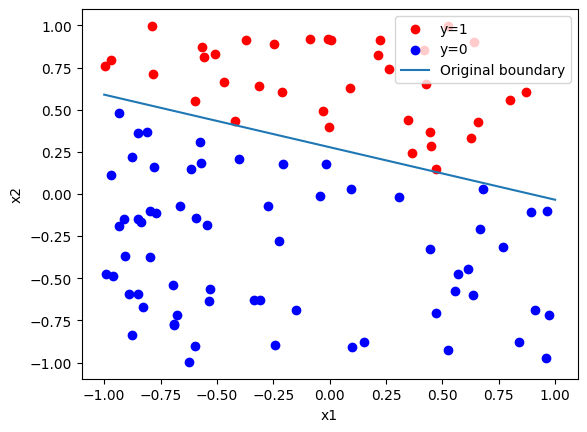

Final weights: [-1.2080421   1.3477244   4.50803856]
Errors: [13, 6, 2, 2, 2, 4, 4, 2, 0]


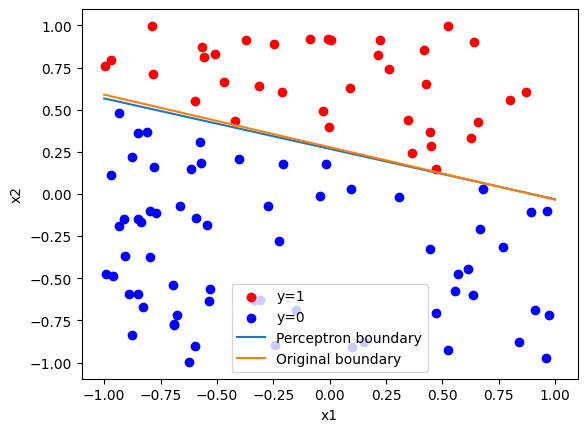

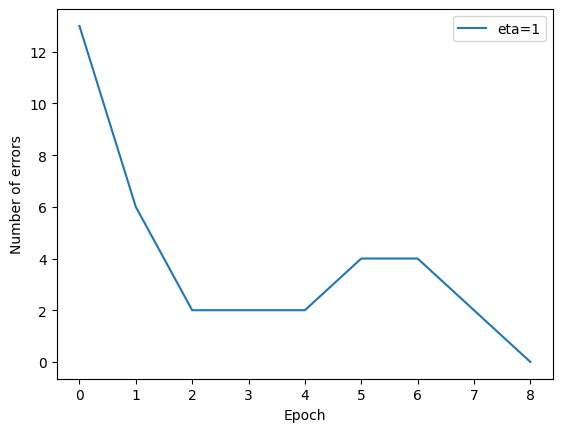

In [8]:
compute(100, [1], w_star)

Initial weights: [-0.20804209774248367, 0.15008323417476732, -0.372239200383498]


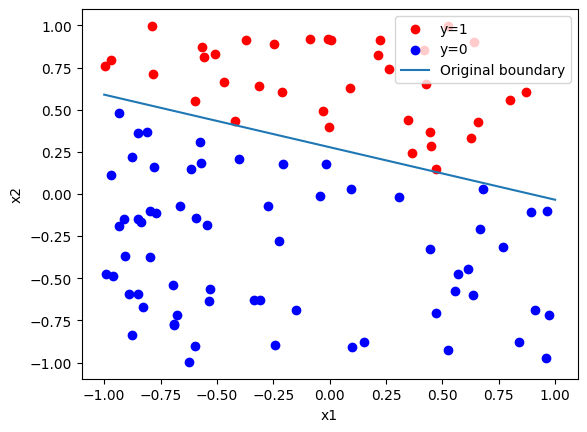

Final weights: [-1.2080421   1.3477244   4.50803856]
Errors: [13, 6, 2, 2, 2, 4, 4, 2, 0]


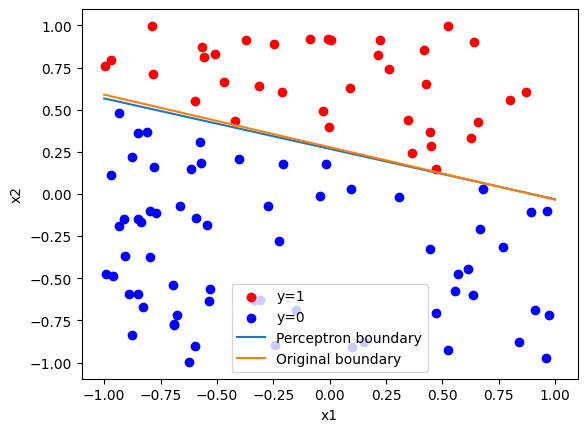

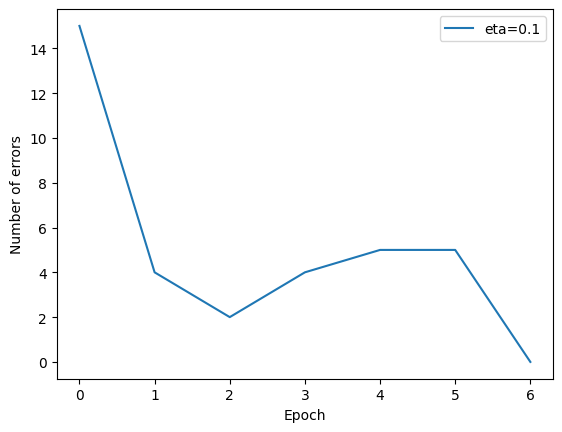

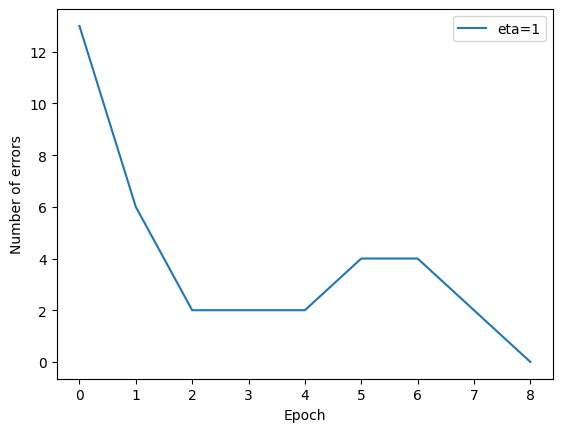

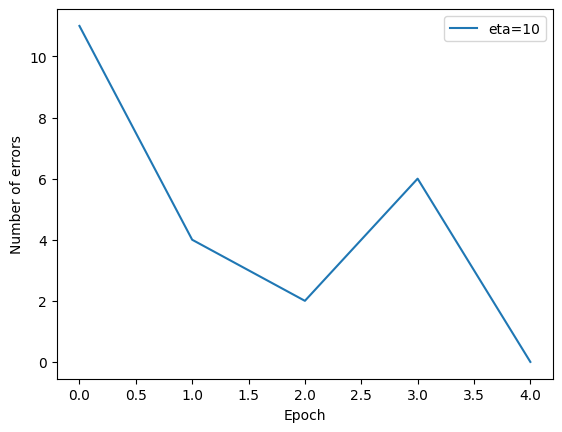

In [9]:
compute(100, [0.1, 1, 10], w_star)

Initial weights: [-0.20804209774248367, 0.15008323417476732, -0.372239200383498]


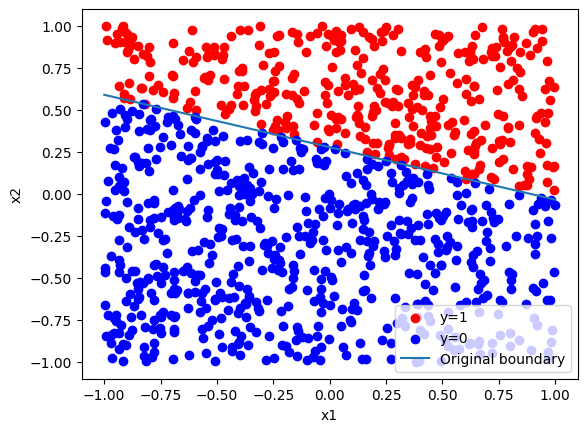

Final weights: [-7.2080421   8.05960245 25.83207236]
Errors: [61, 27, 34, 36, 25, 8, 10, 12, 32, 26, 24, 21, 18, 6, 6, 2, 10, 18, 24, 22, 24, 20, 11, 14, 12, 12, 10, 10, 14, 22, 22, 18, 20, 21, 14, 20, 12, 10, 8, 12, 10, 18, 14, 18, 16, 20, 16, 17, 12, 12, 12, 14, 6, 10, 10, 4, 4, 8, 8, 4, 8, 10, 0]


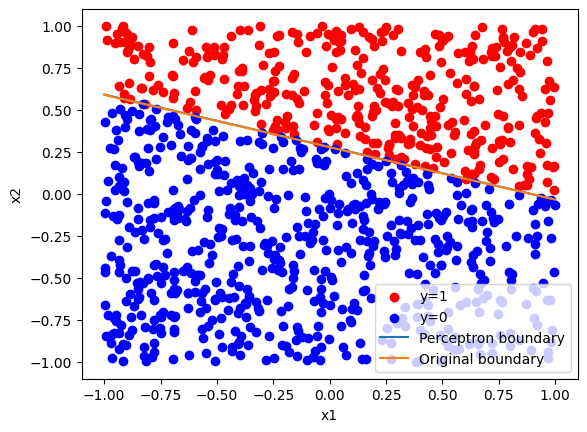

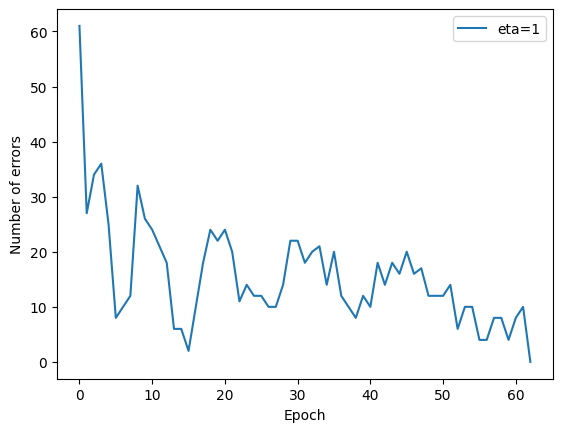

In [10]:
compute(1000, [1], w_star)